In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Preprocessing.

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape #gives the number of rows and columns of a given DataFrame

(10000, 14)

In [5]:
df.describe() #returns description of dataset

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum() #returns the count of null values in each column

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info() # prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.dtypes # returns the datatype of each column.

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1) #Dropping the unnecessary columns

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Visualization

In [13]:
def visualization(x, y, xlabel):
 plt.figure(figsize=(10,5))
 plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
 plt.xlabel(xlabel,fontsize=20)
 plt.ylabel("No. of customers", fontsize=20)
 plt.legend()

In [14]:
df_churn_exited1 = df[df['Exited']==1]['Tenure']
df_churn_not_exited1 = df[df['Exited']==0]['Tenure']

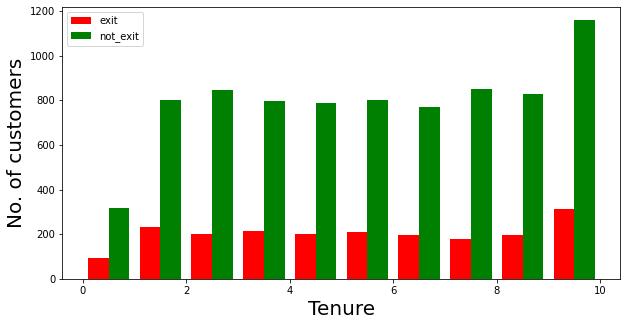

In [15]:
visualization(df_churn_exited1, df_churn_not_exited1, "Tenure")

In [16]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

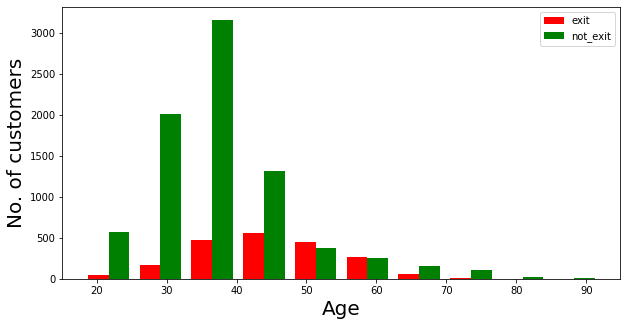

In [17]:
visualization(df_churn_exited2, df_churn_not_exited2, "Age")


In [18]:
df_churn_exited3 = df[df['Exited']==1]['Gender']
df_churn_not_exited3 = df[df['Exited']==0]['Gender']

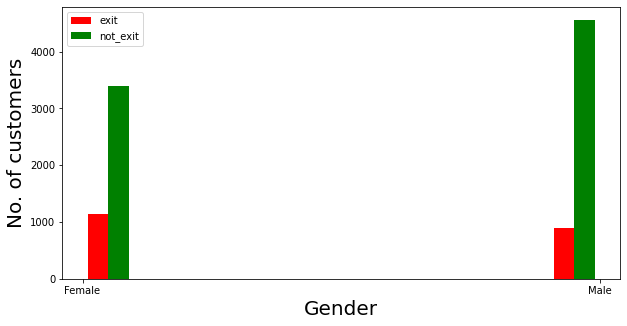

In [19]:
visualization(df_churn_exited3, df_churn_not_exited3, "Gender")


# Converting the categorical variables

In [20]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard', 'IsActiveMember', 'HasCrCard', 'Geography']]

states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)


In [21]:
df = pd.concat([df, gender, states], axis = 1)

# Splitting the training and testing Dataset


In [22]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [23]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [24]:
y = df['Exited']

In [25]:
# from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 0)


# Normalizing the values with mean as 0 and Standard Deviation as 1

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[-0.09792126, -0.55759842, -1.03635146, ...,  0.64198477,
         0.96683535, -0.76862426],
       [-1.12612023,  0.01725942,  0.69700901, ...,  0.64198477,
        -1.03430227, -1.39359887],
       [-0.62230274,  3.5622161 ,  0.00366482, ..., -1.55766936,
         0.96683535, -1.49739308],
       ...,
       [ 0.89943174, -0.36597914,  0.00366482, ...,  0.64198477,
        -1.03430227,  1.41400417],
       [-0.62230274, -0.07855022,  1.39035319, ...,  0.64198477,
         0.96683535,  0.84625811],
       [-0.28299708,  0.87954618, -1.38302356, ...,  0.64198477,
        -1.03430227,  0.32689267]])

In [29]:
X_test

array([[-0.55032881, -0.36597914,  1.0436811 , ...,  0.64198477,
         0.96683535,  1.61245299],
       [-1.31119605,  0.11306906, -1.03635146, ...,  0.64198477,
        -1.03430227,  0.49796226],
       [ 0.57040807,  0.30468834,  1.0436811 , ...,  0.64198477,
         0.96683535, -0.42228531],
       ...,
       [ 0.35448628,  0.11306906, -1.03635146, ...,  0.64198477,
         0.96683535,  1.17026765],
       [ 0.42646021,  2.89154862,  1.73702529, ...,  0.64198477,
         0.96683535, -0.50711407],
       [ 0.82745781,  0.97535582, -0.34300727, ...,  0.64198477,
         0.96683535, -1.15148134]])

# Building the Classifier Model using Keras 

In [30]:
import keras 
#Keras is the wrapper on the top of tenserflow
#Can use Tenserflow as well but won't be able to understand the errors initially. 

In [31]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers


In [32]:
classifier = Sequential()

In [33]:
#To add the layers
#Dense helps to contruct the neurons
#Input Dimension means we have 11 features 
# Units is to create the hidden layers
#Uniform helps to distribute the weight uniformly
classifier.add(Dense(activation = "relu",input_dim = 8,units = 6,kernel_initializer = "uniform")) #relu: codename ffor rectifier activation function

In [34]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))

In [35]:
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform"))


In [36]:
#training
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy'])

In [37]:
classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [38]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50) #Fitting the ANN to trainin


Epoch 1/50
700/700 [==============================] - 5s 3ms/step - loss: 0.5046 - accuracy: 0.7967
Epoch 2/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4394 - accuracy: 0.7977
Epoch 3/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4365 - accuracy: 0.7977
Epoch 4/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4338 - accuracy: 0.7977
Epoch 5/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4309 - accuracy: 0.7977
Epoch 6/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4283 - accuracy: 0.8060
Epoch 7/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4264 - accuracy: 0.8211
Epoch 8/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4248 - accuracy: 0.8223
Epoch 9/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4235 - accuracy: 0.8261
Epoch 10/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4229 - accuracy: 0.8283

In [39]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5) #Predicting the result

94/94 [==============================] - 0s 2ms/step


In [41]:
cm = confusion_matrix(y_test,y_pred)

In [42]:
cm

array([[2316,   63],
       [ 426,  195]], dtype=int64)

In [43]:
accuracy = accuracy_score(y_test,y_pred)

In [44]:
accuracy

0.837

Text(69.0, 0.5, 'Truth')

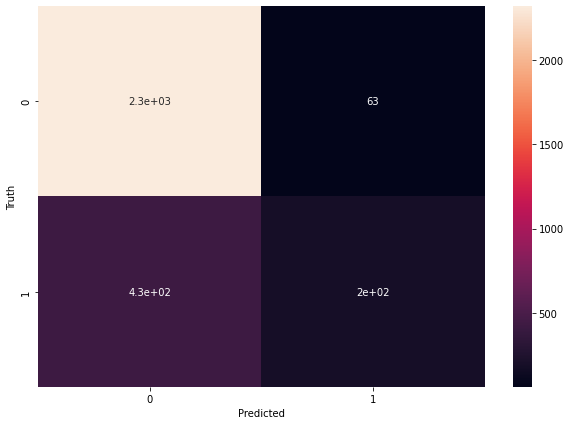

In [45]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2379
           1       0.76      0.31      0.44       621

    accuracy                           0.84      3000
   macro avg       0.80      0.64      0.67      3000
weighted avg       0.83      0.84      0.81      3000

